# House Price Prediction in Bangalore

## Aim

The aim of this project is to predict the price of houses in Bangalore based on various features. The dataset includes the following attributes:

- **area_type**: Specifies the type of area (e.g., "Super built-up Area", "Plot Area", "Built-up Area").
- **availability**: Current availability status of the property (e.g., "Ready to Move", "Immediate Possession", "Launch").
- **location**: The location or neighborhood of the property in Bangalore.
- **size**: The size of the property in terms of bedrooms (e.g., "2 BHK", "3 BHK").
- **society**: The name of the society or residential complex (if available).
- **total_sqft**: The total area of the property in square feet.
- **bath**: Number of bathrooms.
- **balcony**: Number of balconies.
- **price**: The price of the property in lakhs.

## Methodology

### 1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the first step in analyzing a new dataset. The primary objective of EDA is to explore the data to understand its distribution, identify outliers, and detect any anomalies. EDA helps in visualizing and understanding the main characteristics of the data, identifying patterns, and generating hypotheses through graphical representations.

### 2. Feature Engineering

Feature Engineering involves transforming raw data into meaningful features that better represent the underlying problem to predictive models. This step includes:

- **Handling Missing Values**: Addressing any missing data in the dataset.
- **Handling Outliers**: Identifying and dealing with outliers in the dataset to improve model performance.
- **Handling Categorical Data**: Converting categorical variables into numerical format using techniques like one-hot encoding or label encoding.

### 3. Feature Selection

Feature Selection involves identifying the most important features that contribute to predicting the target variable and removing unnecessary ones. Techniques such as correlation analysis, feature importance from models, and recursive feature elimination are used.

### 4. Model Building

In this step, we build  machine learning model  Linear Regression to predict house prices. The model is evaluated based on its performance metrics.

### 5. Hyperparameter Tuning

If the model's accuracy is not satisfying, hyperparameter tuning is performed to enhance the model's performance. Techniques like Grid Search and Random Search are used to find the optimal set of hyperparameters for the models.

## Conclusion

This project aims to provide insights into the real estate market in Bangalore by predicting house prices using machine learning techniques. The approach involves thorough data analysis, feature engineering, model selection, and evaluation to achieve the best predictive performance.


###  Exploratory Data Analysis (EDA)

#### Importing necessary libraries
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical computing.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Scikit-learn**: For machine learning algorithms and tools.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"/Users/rahiba/Downloads/Bengaluru_House_Data.csv.xls")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [7]:

df1 = df1.drop(['area_type','availability'],axis='columns')
df1.shape


(13320, 7)

###  Feature Engineering

##### Handling Missing Values

In [8]:
df1.isnull().sum()

location         1
size            16
society       5502
total_sqft       0
bath            73
balcony        609
price            0
dtype: int64

In [9]:
df2 = df1.drop(['society','balcony'],axis='columns')
df2.shape

(13320, 5)

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3 = df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

Extracting BHK as integer from Size

In [15]:
# Extracting the number of BHK using str.split() method
df3['bhk'] = df3['size'].str.split(' ').str[0].astype(int)

# Viewing unique BHK values
unique_bhk_values = df3['bhk'].unique()
print("Unique BHK values:", unique_bhk_values)

Unique BHK values: [ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
#Drop the 'size' column
df3 = df3.drop(columns=['size'],axis='columns')

df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


Explore total_sqft feature

In [18]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# Function to check if a string can be converted to float
def is_float(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

# Display all entries in 'total_sqft' that are not flat (i.e., not convertible directly to float)
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [20]:
# Define a function to convert square feet values to a numeric form
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   


In [21]:
df4 = df3.copy()

# Apply the conversion function to the 'total_sqft' column
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)


# Remove rows where 'total_sqft' could not be converted (i.e., is NaN)
df4 = df4[df4['total_sqft'].notnull()]
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


Add new feature called price per square feet. The price_per_sqft (price per square feet) feature is a crucial metric in real estate analysis for several reasons. It provides a standardized way to compare property prices regardless of their size.

In [22]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

##### Dimensionality reduction for location feature

In [24]:
# Remove leading and trailing whitespace from each entry in the 'location' column
df5['location'] = df5['location'].apply(lambda x: x.strip())

location_stats = df5['location'].value_counts(ascending=False)
location_stats


location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [25]:
# Count how many locations appear 10 times or fewer
len(location_stats[location_stats <= 10])


1047

To simplify our dataset and improve model efficiency, we can categorize any location with fewer than 10 data points as "Other". This consolidation simplifies the dataset by decreasing the number of unique location categories. Consequently, when we apply one-hot encoding, it will produce fewer dummy variables, making the model less complex and more efficient to train.

In [26]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [27]:
len(df5.location.unique())

1287

In [28]:
df5['location'] = np.where(df5['location'].isin(location_stats_less_than_10.index), 'Other', df5['location'])


In [29]:
df5.tail(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
13310,Rachenahalli,1050.0,2.0,52.71,2,5020.000000
13311,Ramamurthy Nagar,1500.0,9.0,250.00,7,16666.666667
13312,Bellandur,1262.0,2.0,47.00,2,3724.247227
13313,Uttarahalli,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319
13319,Doddathoguru,550.0,1.0,17.00,1,3090.909091


##### Handling Outlier

In real estate, it is commonly understood that each bedroom typically requires at least 300 square feet. Therefore, a 2-bedroom (2 BHK) apartment should have a minimum of 600 square feet.

When analyzing the data, any 2 BHK apartment with significantly less space, such as 400 square feet, is likely erroneous or an anomaly. These entries can be considered outliers because they deviate from the expected size norms. Removing such outliers is crucial as they can skew analysis and model predictions. To ensure data accuracy, we will set a minimum threshold of 300 square feet per bedroom and exclude any properties that fall below this threshold from our dataset.



In [30]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,Other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Other,500.0,3.0,100.0,3,20000.000000


Here We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that must be removed.

In [31]:
initial_shape = df5.shape
print("Initial DataFrame shape:", initial_shape)

Initial DataFrame shape: (13200, 6)


In [32]:
# Remove outliers where the total square footage per bedroom is less than 300 sqft
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]

# Shape of DataFrame after removing outliers
new_shape = df6.shape
print("New DataFrame shape after removing outliers:", new_shape)

New DataFrame shape after removing outliers: (12456, 6)


##### Outlier removal using Std and mean

In [33]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
# Function to remove PPS outliers per location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for location, subdf in df.groupby('location'):
        mean_pps = subdf.price_per_sqft.mean()
        std_pps = subdf.price_per_sqft.std()
        filtered_df = subdf[(subdf.price_per_sqft > (mean_pps - std_pps)) & 
                            (subdf.price_per_sqft <= (mean_pps + std_pps))]
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
print("DataFrame shape after removing PPS outliers:", df7.shape)

DataFrame shape after removing PPS outliers: (10293, 6)


In [35]:
# Function to plot scatter chart for a given location
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()

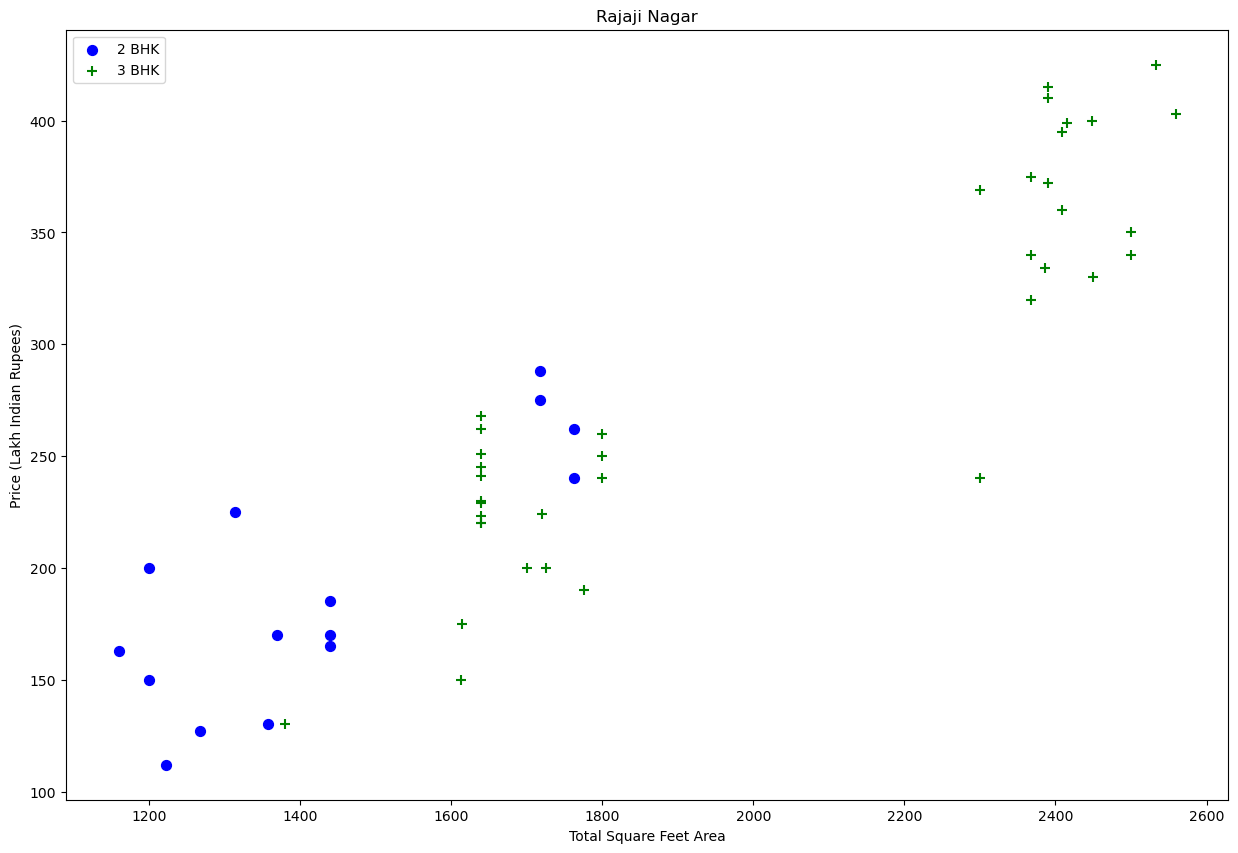

In [36]:
# Example plot for a specific location
plot_scatter_chart(df7, "Rajaji Nagar")


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = []
    for location, location_df in df.groupby('location'):
        bhk_stats = {
            bhk: {
                'mean': bhk_df.price_per_sqft.mean(),
                'std': bhk_df.price_per_sqft.std(),
                'count': bhk_df.shape[0]
            }
            for bhk, bhk_df in location_df.groupby('bhk')
        }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices.extend(bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices)


df8 = remove_bhk_outliers(df7)
print("DataFrame shape after removing BHK-specific outliers:", df8.shape)

DataFrame shape after removing BHK-specific outliers: (7365, 6)


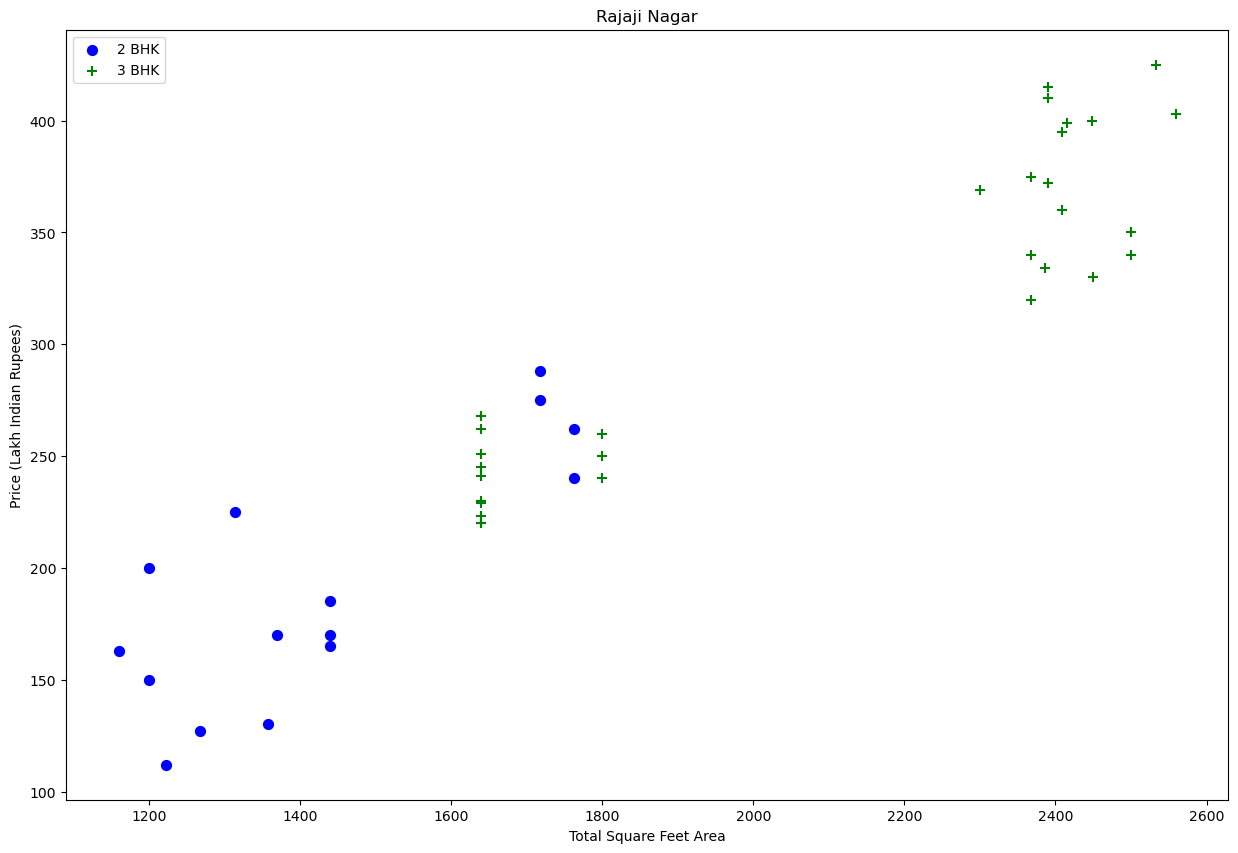

In [42]:
plot_scatter_chart(df8,"Rajaji Nagar")

##### Outlier removal using bathroom feature

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,7000.0,8.0,450.0,4,6428.571429
5887,Other,11338.0,9.0,1000.0,6,8819.897689
9063,Thanisandra,1806.0,6.0,116.0,3,6423.034330


It is unusual to have 2 bathroom more than the total number of room so lets avoid it

In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7286, 6)

In [47]:
df9.head(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


##### Removing unwanted features

In [48]:
df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
#### Handling categorical data

In [49]:
dummies = pd.get_dummies(df10.location)
dummies.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
df11 = pd.concat([df10,dummies.drop('Other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Building the model

In [54]:
df12.shape

(7286, 244)

In [55]:
X = df12.drop(['price'],axis='columns')  #independent features
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
y = df12.price #dependent feature ie output
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


###  Model Building

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8857418487649439

##### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77260889, 0.85694909, 0.85103777, 0.85683826, 0.81469601,
       0.86631281])

###  Hyperparameter Tuning

##### Find best model using GridSearchCV

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [84]:
def find_best_model_using_gridsearchcv(X, y):
    # Define the models and their respective hyperparameters
    algorithms = {
        'Linear Regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params': {
                'regressor__fit_intercept': [True, False] 
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    results = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for model_name, config in algorithms.items():
        grid_search = GridSearchCV(
            estimator=config['model'],
            param_grid=config['params'],
            cv=cv,
            return_train_score=False
        )
        
        grid_search.fit(X, y)
        
        results.append({
            'Model': model_name,
            'Best Score': grid_search.best_score_,
            'Best Parameters': grid_search.best_params_
        })
    
    results_df = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Parameters'])
    
    results_df.sort_values(by='Best Score', ascending=False, inplace=True)
    
    results_df.reset_index(drop=True, inplace=True)
    
    return results_df

best_models_df = find_best_model_using_gridsearchcv(X, y)

# Set display options for better readability
pd.set_option('display.max_colwidth', None)  
    

# Print the DataFrame in a tabulated format
print(tabulate(best_models_df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════════╤══════════════╤═════════════════════════════════════════════════════╕
│ Model             │   Best Score │ Best Parameters                                     │
╞═══════════════════╪══════════════╪═════════════════════════════════════════════════════╡
│ Linear Regression │     0.830426 │ {'regressor__fit_intercept': True}                  │
├───────────────────┼──────────────┼─────────────────────────────────────────────────────┤
│ Decision Tree     │     0.714175 │ {'criterion': 'friedman_mse', 'splitter': 'random'} │
├───────────────────┼──────────────┼─────────────────────────────────────────────────────┤
│ Lasso Regression  │     0.667387 │ {'alpha': 1, 'selection': 'cyclic'}                 │
╘═══════════════════╧══════════════╧═════════════════════════════════════════════════════╛


#### Test the model for few properties

In [85]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [86]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

82.34778368365193

In [94]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

80.89476127770723

In [91]:
predict_price('1st Phase JP Nagar',1000, 3, 2)

84.3128898919296

In [87]:
predict_price('Indira Nagar',1000, 2, 2)

179.09598873261416

In [90]:
predict_price('Indira Nagar',2000, 2, 3)

263.27839621916263

In [92]:
predict_price('Indira Nagar',1000, 3, 2)

181.06109494089185

In [93]:
predict_price('Indira Nagar',1000, 3, 3)

179.60807253494715

#### Export the tested model to a pickle file

In [95]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#### Export location and column information to a file that will be useful later on in our prediction application

In [96]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))